<span style="font-size:200%; text-align:left;"><b>Lab setup of long SRC in a Michelson</b></span>
<br/>



# Importing packages

In [1]:
import pykat
import pykat.ifo as ifo
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot
from pykat.optics import ABCD as a

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

import pickle
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset']=False


from scipy.optimize import minimize
from pykat.optics.gaussian_beams import BeamParam

                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## The model

In [2]:
base = pykat.finesse.kat()
base.verbose = True
base.load("LongSRC_design_06Oct.kat")

base.removeBlock('Photodiodes')


# Run 0
SRC parameters without TSRC

In [3]:
RoC = [0.1,0.25,0.5,0.75,1,1.333,1.5,2,3,4,5,6.667,10]   # RoCs available off the shelf


RoC_EX = 5
RoC_EY = 5


w_crys = 30e-6

# Constraints
w_bs = 3.4e-3
w_etm = 4.8e-3
w_srm = 4.8e-3

## Resonance conditions for carrier in SRC

--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:10:42.135515

Finished in 0.0225298 seconds


100% | ETA:  0:00:00 | Calculating                                             

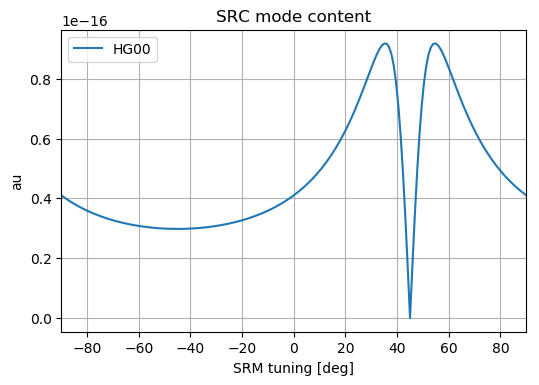

In [4]:
kat = base.deepcopy()
kat.maxtem = 'off'
kat.cTSRM.remove()

kat.parse("""
ad C 0 0 0 nSRM1
pd P_HOM nSRM1*
xaxis SRM phi lin -90 90 200

yaxis abs
""")
kat.eom1.midx = 0
out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')


ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('SRC mode content')
ax.set_xlabel('SRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)




### Current SRC parameters

In [5]:
kat = base.deepcopy()
kat.cTSRM.remove()

kat.parse("""
bp w_ex x w nEMx
bp w_ey x w nEMy
bp w_bs x w nBS4
bp w_srm x w nSRM1

cp cSRMX x m
cp cSRMY x m
cp cSRMX y m
cp cSRMY y m 

noxaxis
yaxis abs

mismatches
""")
kat.eom1.midx = 0

out = kat.run()
print(out.stdout)
print()
print('      w (mm) max_w (mm)')
print('EX:  {:.4f}   {} '.format(out['w_ex']*1e3, w_etm*1e3 ))
print('EY:  {:.4f}   {} '.format(out['w_ey']*1e3, w_etm*1e3 ))
print('BS:  {:.4f}   {} '.format(out['w_bs']*1e3, w_bs*1e3 ))
print('SRM: {:.4f}   {} '.format(out['w_srm']*1e3, w_srm*1e3 ))

print()

print('EX:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ex']-w_etm)*1e3, (out['w_ex']-w_etm)/np.abs(w_etm) ) )
print('EY:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_ey']-w_etm)*1e3, (out['w_ey']-w_etm)/np.abs(w_etm) ) )
print('BS:  diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_bs']-w_bs)*1e3, (out['w_bs']-w_bs)/np.abs(w_bs) ) )
print('SRM: diff = {:.2f} mm, rdiff = {:.2} '.format((out['w_srm']-w_srm)*1e3, (out['w_srm']-w_srm)/np.abs(w_srm) ) )
print()

# Checking stability
# --------------------
mX_x = np.abs(out['cSRMX_x_m'])
mY_x = np.abs(out['cSRMY_x_m'])
mX_y = np.abs(out['cSRMX_x_m'])
mY_y = np.abs(out['cSRMY_x_m'])

if (not (mX_x > -1 and mX_x < 1) or not (mX_y > -1 and mX_y < 1) or 
    not (mY_x > -1 and mY_x < 1) or not (mY_y > -1 and mY_y < 1)):
    print('Cavity is unstable!!!!! :(')
    print('Stability parameters: {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y))
else:
    print('Cavity is stable! :) ')
    print('Stability parameters: {}  {}  {}  {}'.format(mX_x, mY_x, mX_y, mY_y))
# --------------------
  
    


Parsing `mismatches` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:10:42.303205

Finished in 0.016336 seconds

------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp_q1i9hx_.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp_q1i9hx_.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmp_q1i9hx_.gnu 
    '  '                                        Mon Oct 14 11:10:42 2019
------------------------------------------------------------------------
 'noxaxis' has b

100% | ETA:  0:00:00 | Calculating                                             

### HOM spacing in SRC

Parsing `tem Laser 0 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 1 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 2 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 3 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem Laser 4 0 1.0 0.0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:11:01.283986


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.295752 seconds


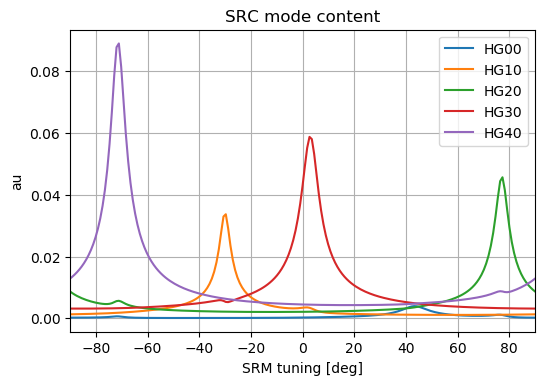

In [7]:
kat = base.deepcopy()
kat.maxtem = 4
kat.cTSRM.remove()

kat.homody_lase.phase = -90

kat.parse("""
tem Laser  0 0 1.0 0.0
tem Laser  1 0 1.0 0.0
tem Laser  2 0 1.0 0.0
tem Laser  3 0 1.0 0.0
tem Laser  4 0 1.0 0.0

xaxis SRM phi lin -90 90 200
yaxis abs

pd P_HOM nSRM1*

ad C 0 0 0 nSRM1*
ad C10 1 0 0 nSRM1*
ad C20 2 0 0 nSRM1*
ad C30 3 0 0 nSRM1*
ad C40 4 0 0 nSRM1*


""")
kat.eom1.midx = 0
out = kat.run()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
#ax.plot(out.x,out['P_HOM'],label = 'DC output')
ax.plot(out.x, out['C'],label = 'HG00')
ax.plot(out.x, out['C10'],label = 'HG10')
ax.plot(out.x, out['C20'],label = 'HG20')
ax.plot(out.x, out['C30'],label = 'HG30')
ax.plot(out.x, out['C40'],label = 'HG40')

ax.set_xlim(out.x.min(),out.x.max())
ax.grid()
ax.legend()
ax.set_title('SRC mode content')
ax.set_xlabel('SRM tuning [deg]')
ax.set_ylabel('au')
plt.show(fig)


#print((out.x[out['C'].argmax()]))
#print((out.x[out['C40'].argmax()]))

# TSRC design


## Designing the TSRC length


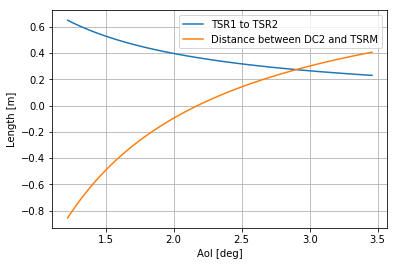

In [8]:
L_SRC = 1.21
# Safety margin between TSR1 and the optical axis between TSR2 and TSRM.
d = 0.015
# Radius of TSR1
a = 0.0127
# Safety margin between TSR1 and DC1 + safety margin between TSR2 and SRM. Quickly estimated values. 
b = 0.025 + 0.025
# Propagation through crystal
c = 1.8*0.01
# Distance of DCs from crystal
e = 0.04
# Transmission through SRM
f = 0.006*1.45

# Distance between telescope mirrors
L = np.linspace(0.23,0.65,100)
# 2*Angle of incidence on telescope mirrors
theta = np.arcsin((a+d)/L)*180.0/np.pi
# TSR path length (SRC with arms excluded)
L_DC2_TSRM = L_SRC - (L*(1.0+2.0*np.cos(theta*np.pi/180.0)) + b + c + e + f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta/2.0, L, label='TSR1 to TSR2')
# ax.plot(theta/2.0, L_tsr, label='TSRC minimum boptical path length')
ax.plot(theta/2.0, L_DC2_TSRM, label='Distance between DC2 and TSRM')

# ax.plot(theta/2.0, L_SRC-L_sr, label='Arm length')

#ax.plot([theta.min()/2.0, theta.max()/2.0],[L_SRC,L_SRC], 'r--', label='SRC length')

ax.grid()
ax.set_xlabel('AoI [deg]')
ax.set_ylabel('Length [m]')
ax.legend()
plt.show(fig)

In [9]:
L_tsr2 = 0.33
# 2*Angle of incidence on telescope mirrors
theta = np.arcsin((a+d)/L_tsr2)*180.0/np.pi
# TSR path length (SRC with arms excluded)
L_tsr1 = L_tsr2*np.cos(theta*np.pi/180.0) + 0.025
L_tsr3 = L_tsr2*np.cos(theta*np.pi/180.0) + 0.01
L_DC2_TSRM = L_SRC - (L_tsr2*(1.0+2.0*np.cos(theta*np.pi/180.0)) + b + c + e + f)
L_tsr2_crys = L_tsr3 + 2e-2 #2 cm is the distance from dichroic to crystal
L_Crys_TSRM = L_DC2_TSRM + 2e-2 #2 cm is the distance from dichroic to crystal

print('Angle of incidence: {} deg'.format(theta/2.0))
print('L_DC2_TSRM: {} m'.format(L_DC2_TSRM))
print('L_tsr1: {} m'.format(L_tsr1))
print('L_tsr3: {} m'.format(L_tsr3))
print('TSR2 to crystal: {} m'.format(L_tsr2_crys))
print('Crystal to TSR: {} m'.format(L_Crys_TSRM))


Angle of incidence: 2.4075193269558257 deg
L_DC2_TSRM: 0.10562923130186164 m
L_tsr1: 0.35383538434906914 m
L_tsr3: 0.3388353843490691 m
TSR2 to crystal: 0.35883538434906914 m
Crystal to TSR: 0.12562923130186163 m


In [10]:
0.330*np.sin(4.815*np.pi/180.0)

0.027699778155138768

In [11]:
a+d

0.0277

In [12]:
2.4075193269558257*2

4.815038653911651

In [13]:
0.12562923130186163 - 0.0256

0.10002923130186163

In [14]:
0.0256 + 0.02

0.0456

In [15]:
0.1 -0.0456 

0.054400000000000004

In [16]:
from pykat.optics import ABCD as a

w0 = 30e-6
q0 = BeamParam(w0=w0, z=0, nr=kat.sCRYS.n.value)
S0 = a.space(kat.sCRYS.n.value, kat.sCRYS.L.value/2.0)
S1 = a.mirror_trans(kat.sCRYS.n.value, 1, np.inf)
S3 = a.space(1,0.42)

Ssum1 = S3 * S1 * S0

q2 = a.apply(Ssum1, q0, 1.8, 1.0)

q2.w

0.004772997764312543

In [19]:
kat = base.deepcopy()
kat.cTSRM.remove()
kat.homody_lase.phase = -90

kat.ltsr1.L = 35.38e-2
kat.ltsr2.L = 33e-2
kat.TSR2_crys.L = (33.88 + 4.56)*1e-2
kat.lcrys_tsrm.L = 10e-2


kat.TSRM.Rc = 0.1

kat.parse("""

bp qex x q nEMx
bp qbsx x q nBS4
bp qsrm x q nSRM2
bp qtsr1 x q nTSR1a
bp qtsr2 x q nTSR2a
bp qcr1 x q nCRYS1a
bp q_cr1b x q nCRYS1b
bp qcr2 x q nCRYS2b
bp qtsrm x q nTSRM1


cp cSRMX x m
cp cSRMY x m
cp cSRMX y m
cp cSRMY y m

noxaxis
yaxis abs:deg
trace 10
""")

                
out = kat.run()


qex = out['qex']

qbsx = out['qbsx']
qsrm = out['qsrm']

qtsr1 = out['qtsr1']
qtsr2 = out['qtsr2']


qcr1 = out['qcr1']
qcr2 = out['qcr2']
qtsrm = out['qtsrm']



--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:11:16.152128

Finished in 0.021147 seconds


100% | ETA:  0:00:00 | Calculating                                             

In [22]:
def stability_tsrc(rocs):
    roc1 = rocs[0]
    roc2 = rocs[1]
    
    # Outbound
    S1  = a.space(1.45, 0.006)
    S2  = a.mirror_trans(1.45, 1, np.inf)
    S3  = a.space(1,kat.ltsr1.L.value + dL)
    S4  = a.mirror_refl(1,roc1)
    S5  = a.space(1, kat.ltsr2.L.value - dL)
    S6  = a.mirror_refl(1,roc2)
    S7  = a.space(1, kat.TSR2_crys.L) # Not allowed to be larger than 42 cm
    S8  = a.mirror_trans(1, kat.sCRYS.n.value, np.inf) 
    S9  = a.space(kat.sCRYS.n.value, kat.sCRYS.L.value)
    S10  = a.mirror_trans(kat.sCRYS.n.value, 1, np.inf) 
    S11 = a.space(1,kat.lcrys_tsrm.L.value)
    S12 = a.mirror_refl(1,0.1)
    
    # Inbound
    S13 = S11
    S14 = S8
    S15 = S9
    S16 = S10
    S17 = S7
    S18 = S6
    S19 = S5
    S20 = S4
    S21 = S3
    S22 = a.mirror_trans(1, 1.45, np.inf)
    S23 = S1
    S24 = a.mirror_refl(1.45, -2.0)

    
    M = S24*S23*S22*S21*S20*S19*S18*S17*S16*S15*S14*S13*S12*S11*S10*S9*S8*S7*S6*S5*S4*S3*S2*S1
    return (M[0,0] + M[1,1])/2.0

stability_tsrc(rocs)

-0.08888680120389947

In [21]:
from scipy.optimize import minimize
from pykat.optics import ABCD as a

q0 = BeamParam(q=qsrm)
q1 = BeamParam(w0=30e-6, z=0, nr=1.8)


def stability_tsrc(rocs):
    roc1 = rocs[0]
    roc2 = rocs[1]
    
    # Outbound
    S1  = a.space(1.45, 0.006)
    S2  = a.mirror_trans(1.45, 1, np.inf)
    S3  = a.space(1,kat.ltsr1.L.value + dL)
    S4  = a.mirror_refl(1,roc1)
    S5  = a.space(1, kat.ltsr2.L.value - dL)
    S6  = a.mirror_refl(1,roc2)
    S7  = a.space(1, kat.TSR2_crys.L) # Not allowed to be larger than 42 cm
    S8  = a.mirror_trans(1, kat.sCRYS.n.value, np.inf) 
    S9  = a.space(kat.sCRYS.n.value, kat.sCRYS.L.value)
    S10  = a.mirror_trans(kat.sCRYS.n.value, 1, np.inf) 
    S11 = a.space(1,kat.lcrys_tsrm.L.value)
    S12 = a.mirror_refl(1,0.1)
    
    # Inbound
    S13 = S11
    S14 = S8
    S15 = S9
    S16 = S10
    S17 = S7
    S18 = S6
    S19 = S5
    S20 = S4
    S21 = S3
    S22 = a.mirror_trans(1, 1.45, np.inf)
    S23 = S1
    S24 = a.mirror_refl(1.45, -2.0)

    
    M = S24*S23*S22*S21*S20*S19*S18*S17*S16*S15*S14*S13*S12*S11*S10*S9*S8*S7*S6*S5*S4*S3*S2*S1
    return (M[0,0] + M[1,1])/2.0


# Define mode overlap function between SRC and TSRC
def overlap(q_1, q_2):
    return 4.0*np.abs(q_1.imag * q_2.imag)/np.abs( q_1.q.conjugate() - q_2.q)**2
    
dL = 0.162
def roc(roc1,roc2,q0):
    S0  = a.space(1, kat.ltsr1.L.value + dL)
    S1  = a.mirror_refl(1,roc1)
    S2  = a.space(1, kat.ltsr2.L.value - dL)
    S3  = a.mirror_refl(1,roc2)
    S4  = a.space(1, kat.TSR2_crys.L) # Not allowed to be larger than 42 cm
    S5  = a.mirror_trans(1, kat.sCRYS.n.value, np.inf) 
    S6  = a.space(kat.sCRYS.n.value, kat.sCRYS.L.value/2.0)
    #S7  = a.space(kat.sCRYS.n.value, kat.sCRYS.L.value/2.0)
    #S8  = a.mirror_trans(kat.sCRYS.n.value, 1, np.inf) 
    #S9  = a.space(1,kat.lcrys_tsrm.L.value)
    #S10 = a.mirror_trans(1, roc3)
    
    #Ssum = S10 * S9 * S8 * S7 * S6 * S5 * S4 * S3 * S2 * S1 * S0
    Ssum = S6 * S5 * S4 * S3 * S2 * S1 * S0

    return a.apply(Ssum, q0, 1, 1.8)


def fun(diopt1, diopt2):
    roc1 = 1.0/diopt1
    roc2 = 1.0/diopt2
    q = roc(roc1,roc2,q0)
    mm = overlap(q, q1)
    return 1.0-mm
    
def fun2(rocs):
    roc1 = 1.0/rocs[0]
    roc2 = 1.0/rocs[1]
    q = roc(roc1,roc2,q0)
    mm = overlap(q, q1)
    return 1.0-mm
    
    
    
sol1 = minimize(fun2, (1,1), method='Nelder-Mead',tol=None) #output returned in diopters. 
                                                            # The output currently returned currently is 
                                                            # optimal for the set lengths
rocs = 1.0/sol1.x
mm = sol1.fun
m = stability_tsrc(rocs)
g = (m+1.0)/2
print('Mismatch = {:.2e}'.format(mm))
print('RoC1 = {0[0]:.5f} m,  RoC2 = {0[1]:.5f} m'.format(rocs))
print('TSRC stability: m = {:.3f},  g = {:.3f}'.format(m,g))

Mismatch = 3.15e-12
RoC1 = -0.07224 m,  RoC2 = 0.26657 m
TSRC stability: m = -0.089,  g = 0.456


In [23]:
q2

<BeamParam (w0=3e-05, w=0.004772997764312543, z=0.42277777777777775) at 0x18236f7128>

In [24]:
fun2(1.0/np.array([0.2,  0.5]))

0.9994269863213976

In [25]:
sol = minimize(fun, -1, args=(1.0/0.25), method='Nelder-Mead',tol=None) # 0.5 seems to be the closest to best we can get for the current lengths
sol

 final_simplex: (array([[-29.76152344],
       [-29.76162109]]), array([0.33208129, 0.33208129]))
           fun: 0.33208129452616986
       message: 'Optimization terminated successfully.'
          nfev: 52
           nit: 26
        status: 0
       success: True
             x: array([-29.76152344])

In [26]:
RoC
# For 0.25 and kat.ltsr2.L.value - 0.15 and kat.TSR2_crys.L - 0.1

[0.1, 0.25, 0.5, 0.75, 1, 1.333, 1.5, 2, 3, 4, 5, 6.667, 10]

In [27]:
print(kat.ltsr1.L.value)
print(kat.ltsr2.L.value - 0.05)
print(kat.TSR2_crys.L - .1)


print(kat.lcrys_tsrm.L +0.15)


0.3538
0.28
0.2844000000000001
0.25


In [28]:
0.25 + 10e-2

0.35

In [ ]:
1/2.571

In [ ]:
1/-7.88531232,  1/2.57107127

In [ ]:
# kat.ltsr2.L.value - a1, kat.ltsr1.L.value + a1 , a1 = .15 ---- fun = 0.45

In [ ]:
33e-2 - 0.15

# Playground

In [30]:
kat = base.deepcopy()
kat.homody_lase.phase = -90
#kat.cTSRM.remove()

kat.TSR1.Rc = 500e-3
kat.TSR2.Rc = 150e-3

kat.ltsr1.L = 173.588e-3
kat.ltsr2.L = 648.834e-3
kat.TSR2_crys.L = 91.3781e-3
kat.lcrys_tsrm.L = 100e-3

kat.TSRM.Rc = 100e-3

kat.parse("""

bp qex x q nEMx
bp qbsx x q nBS4
bp qsrm x q nSRM1
bp qtsr1 x q nTSR1a
bp qtsr2 x q nTSR2a
bp qcr1 x q nCRYS1a
bp q_cr1b x q nCRYS1b
bp qcr2 x q nCRYS2b
bp qtsrm x q nTSRM1


cp cSRMX x m
cp cSRMY x m
cp cSRMX y m
cp cSRMY y m

noxaxis
yaxis abs:deg
trace 10
""")

                
out = kat.run()


qex = out['qex']

qbsx = out['qbsx']
qsrm = out['qsrm']

qtsr1 = out['qtsr1']
qtsr2 = out['qtsr2']


qcr1 = out['qcr1']
qcr2 = out['qcr2']
qtsrm = out['qtsrm']



print(out.stdout)


--------------------------------------------------------------
Running kat - Started at 2019-10-14 11:11:36.443052

Finished in 0.0205939 seconds

------------------------------------------------------------------------
                     FINESSE 2.2                (build 2.2-31-ge1141681)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        06.03.2019         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpkwut_qb5.kat,
  ~~ \)-'   '        Output file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpkwut_qb5.out,
     / |             Gnuplot file /var/folders/k1/yts33d_93v1_9yd1768nkwph0000gn/T/tmpkwut_qb5.gnu 
    '  '                                        Mon Oct 14 11:11:36 2019
------------------------------------------------------------------------
 'noxaxis' has been set, ignoring all other xaxis commands
 --- cavity tracing
 cavity cSRMX:
  

100% | ETA:  0:00:00 | Calculating                                             

In [ ]:
kat.ltsr1.L

In [31]:
from scipy.optimize import minimize
from pykat.optics import ABCD as a

q0 = BeamParam(q=qsrm)
q1 = BeamParam(w0=30e-6, z=0, nr=1.8)


def stability_tsrc(rocs):
    roc1 = rocs[0]
    roc2 = rocs[1]
    
    # Outbound
    S1  = a.space(1.45, 0.006)
    S2  = a.mirror_trans(1.45, 1, np.inf)
    S3  = a.space(1,0.3538+dL-dL2)                   # L_TSR1
    S4  = a.mirror_refl(1,roc1)
    S5  = a.space(1, 0.33-dL)                    # L_TSR2
    S6  = a.mirror_refl(1,roc2)
    S7  = a.space(1.0, 0.3388+0.0456+dL2)         # L_TSR3 + DC-->Crystal
    S8  = a.mirror_trans(1.0, 1.8, np.inf) 
    S9  = a.space(1.8, 0.01)
    S10 = a.mirror_trans(1.8, 1.0, np.inf) 
    S11 = a.space(1.0, 0.0456 + 0.0544)       # Crystal-->DC + DC-->TSRM
    S12 = a.mirror_refl(1,0.1)
    
    # Inbound
    S13 = S11
    S14 = S8
    S15 = S9
    S16 = S10
    S17 = S7
    S18 = S6
    S19 = S5
    S20 = S4
    S21 = S3
    S22 = a.mirror_trans(1, 1.45, np.inf)
    S23 = S1
    S24 = a.mirror_refl(1.45, -2.0)

    
    M = S24*S23*S22*S21*S20*S19*S18*S17*S16*S15*S14*S13*S12*S11*S10*S9*S8*S7*S6*S5*S4*S3*S2*S1
    return (M[0,0] + M[1,1])/2.0


# Define mode overlap function between SRC and TSRC
def overlap(q_1, q_2):
    return 4.0*np.abs(q_1.imag * q_2.imag)/np.abs( q_1.q.conjugate() - q_2.q)**2
    

def roc(roc1,roc2,q0):
    S0  = a.space(1,0.3538+dL-dL2)                   # L_TSR1
    S1  = a.mirror_refl(1,roc1)
    S2  = a.space(1, 0.33-dL)                    # L_TSR2
    S3  = a.mirror_refl(1,roc2)
    S4  = a.space(1.0, 0.3388+0.0456+dL2)         # L_TSR3 + DC-->Crystal
    S5  = a.mirror_trans(1.0, 1.8, np.inf) 
    S6  = a.space(1.8, 0.01/2.0)
    M = S6 * S5 * S4 * S3 * S2 * S1 * S0

    return a.apply(M, q0, 1, 1.8)


def fun(diopt1, diopt2):
    roc1 = 1.0/diopt1
    roc2 = 1.0/diopt2
    q = roc(roc1,roc2,q0)
    mm = overlap(q, q1)
    return 1.0-mm
    
def fun2(rocs):
    roc1 = 1.0/rocs[0]
    roc2 = 1.0/rocs[1]
    q = roc(roc1,roc2,q0)
    mm = overlap(q, q1)
    return 1.0-mm
    
   
dL2 = 0.0
dLs = np.linspace(-0.3, 0.3, 101)
for dL in dLs:
    sol1 = minimize(fun2, (1,1), method='Nelder-Mead',tol=None) #output returned in diopters. 
                                                            # The output currently returned currently is 
                                                            # optimal for the set lengths
    rocs = 1.0/sol1.x
    mm = sol1.fun
    m = stability_tsrc(rocs)
    g = (m+1.0)/2
    print('dL = {:.4f}, dL2= {:.4f}, mismatch = {:.2e}'.format(dL,dL2, mm))
    print('RoC1 = {0[0]:.4f} m,  RoC2 = {0[1]:.4f} m'.format(rocs))
    print('TSRC stability: m = {:.3f},  g = {:.3f}'.format(m,g))
    print()

dL = -0.3000, dL2= 0.0000, mismatch = 4.23e-11
RoC1 = -0.1970 m,  RoC2 = 0.5042 m
TSRC stability: m = 0.755,  g = 0.878

dL = -0.2940, dL2= 0.0000, mismatch = 2.89e-11
RoC1 = -0.1958 m,  RoC2 = 0.5026 m
TSRC stability: m = 0.743,  g = 0.871

dL = -0.2880, dL2= 0.0000, mismatch = 3.82e-11
RoC1 = -0.1947 m,  RoC2 = 0.5010 m
TSRC stability: m = 0.731,  g = 0.865

dL = -0.2820, dL2= 0.0000, mismatch = 7.97e-11
RoC1 = -0.1936 m,  RoC2 = 0.4994 m
TSRC stability: m = 0.718,  g = 0.859

dL = -0.2760, dL2= 0.0000, mismatch = 6.18e-11
RoC1 = -0.1924 m,  RoC2 = 0.4977 m
TSRC stability: m = 0.706,  g = 0.853

dL = -0.2700, dL2= 0.0000, mismatch = 2.78e-11
RoC1 = -0.1913 m,  RoC2 = 0.4960 m
TSRC stability: m = 0.694,  g = 0.847

dL = -0.2640, dL2= 0.0000, mismatch = 2.57e-11
RoC1 = -0.1901 m,  RoC2 = 0.4943 m
TSRC stability: m = 0.681,  g = 0.841

dL = -0.2580, dL2= 0.0000, mismatch = 1.35e-11
RoC1 = -0.1889 m,  RoC2 = 0.4926 m
TSRC stability: m = 0.669,  g = 0.834

dL = -0.2520, dL2= 0.0000, misma

dL = 0.1200, dL2= 0.0000, mismatch = 1.66e-11
RoC1 = -0.0877 m,  RoC2 = 0.3057 m
TSRC stability: m = -0.027,  g = 0.487

dL = 0.1260, dL2= 0.0000, mismatch = 6.24e-12
RoC1 = -0.0856 m,  RoC2 = 0.3005 m
TSRC stability: m = -0.036,  g = 0.482

dL = 0.1320, dL2= 0.0000, mismatch = 2.60e-11
RoC1 = -0.0834 m,  RoC2 = 0.2952 m
TSRC stability: m = -0.045,  g = 0.478

dL = 0.1380, dL2= 0.0000, mismatch = 5.57e-12
RoC1 = -0.0812 m,  RoC2 = 0.2898 m
TSRC stability: m = -0.054,  g = 0.473

dL = 0.1440, dL2= 0.0000, mismatch = 2.57e-12
RoC1 = -0.0790 m,  RoC2 = 0.2842 m
TSRC stability: m = -0.063,  g = 0.469

dL = 0.1500, dL2= 0.0000, mismatch = 3.42e-11
RoC1 = -0.0768 m,  RoC2 = 0.2785 m
TSRC stability: m = -0.072,  g = 0.464

dL = 0.1560, dL2= 0.0000, mismatch = 1.28e-11
RoC1 = -0.0745 m,  RoC2 = 0.2726 m
TSRC stability: m = -0.080,  g = 0.460

dL = 0.1620, dL2= 0.0000, mismatch = 3.15e-12
RoC1 = -0.0722 m,  RoC2 = 0.2666 m
TSRC stability: m = -0.089,  g = 0.456

dL = 0.1680, dL2= 0.0000, mismat

In [32]:
dL = -0.3200,  mismatch = 5.79e-11
RoC1 = -0.2006 m,  RoC2 = 0.5094 m
TSRC stability: m = 0.796,  g = 0.898

SyntaxError: invalid syntax (<ipython-input-32-3cee1bf8f458>, line 2)

In [33]:
# Chosen configuration
dL = -0.2817
diopts = 1.0/np.array([-0.200, 0.5])
fun2(diopts)

0.0007223948610494135

In [34]:
0.3538+dL


0.0721

In [35]:
0.33-dL

0.6117

In [36]:
0.3388+0.0456

0.38439999999999996

In [37]:
0.0456+0.0544

0.1

In [38]:
np.arctan(0.0277/(0.3538-0.2817))*180.0/np.pi

21.016207520356655

In [40]:
21.016207520356655/2

10.508103760178328

In [39]:
dL = -0.1440
dL2= 0.1000
mismatch = 5.07e-11
diots = 1/np.array([-0.1,0.5])
fun2(diots)

0.7430232866683557